In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4189094950518071010
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7683116711809396285
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


**Inspecting dataset**

In [4]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


**Visualize our image dataset**

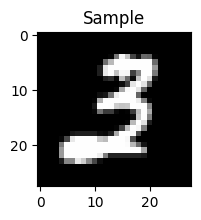

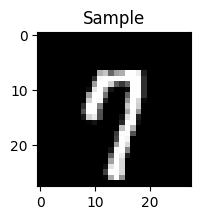

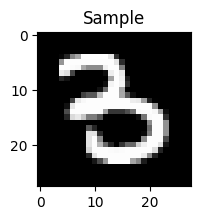

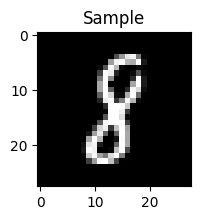

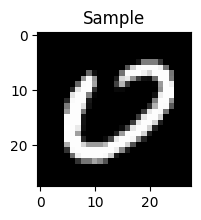

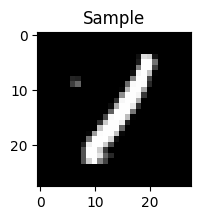

In [5]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

<Figure size 640x480 with 0 Axes>

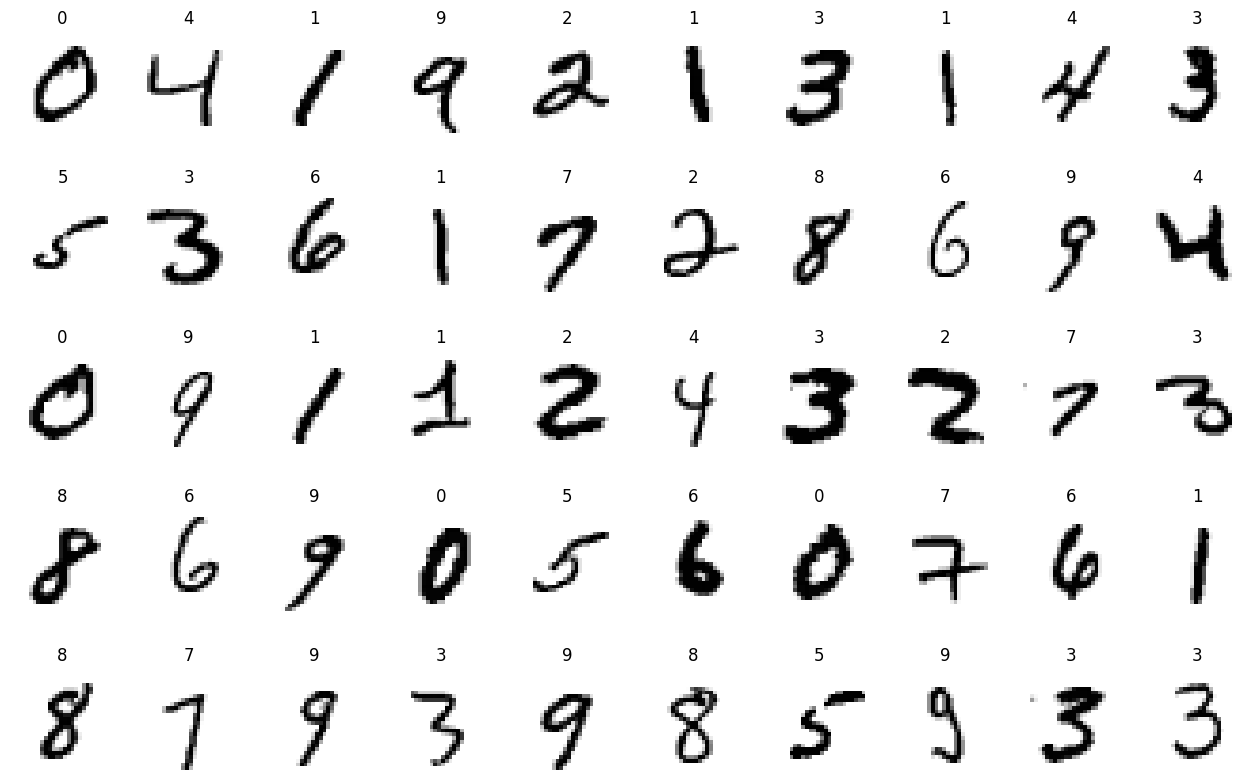

In [6]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

**PreProcessing the dataset**

In [7]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**one hot encoded lables**

In [8]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


**Building Our Model**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.001)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


**Train the Model**

In [10]:
batch_size = 128
epochs = 25

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train),
# the batch size (typically 16 to 128 depending on your RAM), the number of
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2174 - loss: 2.2678 - val_accuracy: 0.4870 - val_loss: 2.1319
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5719 - loss: 2.0124 - val_accuracy: 0.7817 - val_loss: 1.3021
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8008 - loss: 1.0463 - val_accuracy: 0.8656 - val_loss: 0.5537
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8653 - loss: 0.5244 - val_accuracy: 0.8893 - val_loss: 0.4118
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8835 - loss: 0.4166 - val_accuracy: 0.9011 - val_loss: 0.3597
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8954 - loss: 0.3679 - val_accuracy: 0.9086 - val_loss: 0.3307
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8997 - loss: 0.3445 - val_accuracy: 0.9119 - val_loss: 0.3106
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9078 - loss: 0.3232 - val_accuracy:

**Ploting loss in accuracy chart**

In [11]:
history_dict = history.history
history_dict

{'accuracy': [0.31168332695961,
  0.6490333080291748,
  0.8204666376113892,
  0.8695666790008545,
  0.886816680431366,
  0.8959166407585144,
  0.9017999768257141,
  0.9074833393096924,
  0.9117500185966492,
  0.9147666692733765,
  0.9179666638374329,
  0.9211333394050598,
  0.9232166409492493,
  0.9255833625793457,
  0.9279166460037231,
  0.9303500056266785,
  0.9325833320617676,
  0.934583306312561,
  0.9369333386421204,
  0.9382833242416382,
  0.9402666687965393,
  0.9421666860580444,
  0.9431333541870117,
  0.9451666474342346,
  0.9460999965667725],
 'loss': [2.231733560562134,
  1.8305290937423706,
  0.8490405678749084,
  0.490895539522171,
  0.40423280000686646,
  0.3645673096179962,
  0.339626669883728,
  0.321397066116333,
  0.30685949325561523,
  0.2944667637348175,
  0.2834121882915497,
  0.27350106835365295,
  0.2646065354347229,
  0.2562912702560425,
  0.24848386645317078,
  0.24084492027759552,
  0.23357436060905457,
  0.22685615718364716,
  0.2204132229089737,
  0.21404811

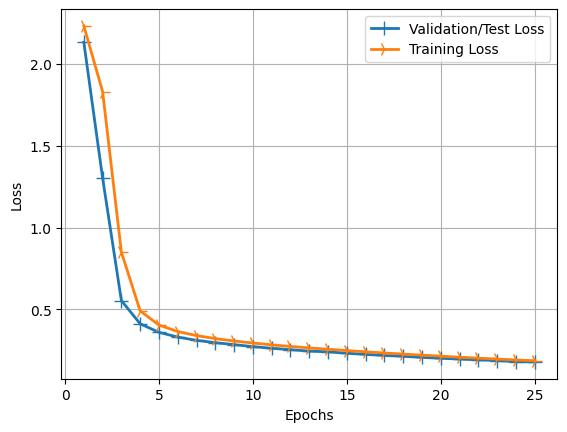

In [12]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**save model**

In [13]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [14]:
# We need to import our load_model function
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

**Get Predictions from our sample test data**

**Load our Keras Model and the MNIST Dataset**

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
model=load_model('mnist_simple_cnn_10_Epochs.h5')

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


**View our Misclassifications**

In [21]:
import numpy as np
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(model.predict(x_test), axis=-1)
print("Completed.\n")


(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completed.



In [22]:
import cv2
import numpy as np
result=np.absolute(y_test-pred)
misclassified_index=np.nonzero(result>0)
print(f"Indices of misclassified data are:\n{misclassified_index}")

Indices of misclassified data are:
(array([   8,   33,  124,  149,  193,  195,  233,  241,  247,  259,  290,
        300,  313,  318,  320,  321,  325,  340,  352,  358,  362,  412,
        444,  445,  448,  478,  479,  502,  507,  511,  531,  551,  565,
        578,  582,  591,  610,  613,  619,  628,  659,  684,  689,  691,
        707,  717,  720,  740,  760,  791,  810,  839,  844,  898,  938,
        939,  947,  950,  951,  959,  965,  990, 1003, 1014, 1039, 1044,
       1062, 1082, 1096, 1107, 1112, 1114, 1173, 1182, 1191, 1194, 1204,
       1206, 1226, 1232, 1242, 1247, 1256, 1260, 1270, 1283, 1289, 1299,
       1319, 1326, 1328, 1337, 1378, 1393, 1433, 1440, 1447, 1453, 1466,
       1494, 1500, 1522, 1527, 1530, 1549, 1553, 1581, 1609, 1621, 1634,
       1671, 1678, 1681, 1709, 1717, 1718, 1754, 1790, 1813, 1828, 1850,
       1857, 1865, 1878, 1883, 1901, 1911, 1917, 1938, 1940, 1941, 1952,
       1970, 1981, 1984, 2016, 2024, 2035, 2043, 2044, 2053, 2070, 2093,
       2098, 21

**Visulaizing the Images our Model Misclassifed**

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


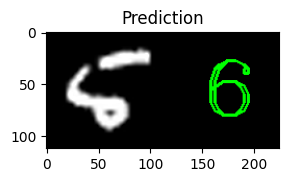

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


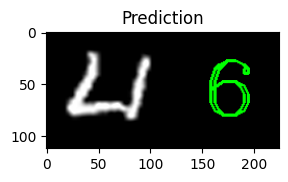

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


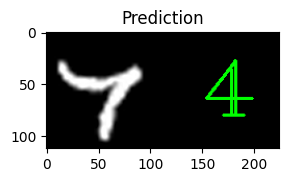

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


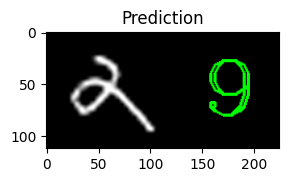

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


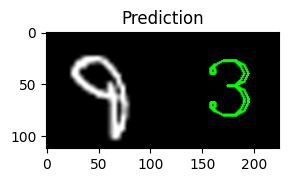

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


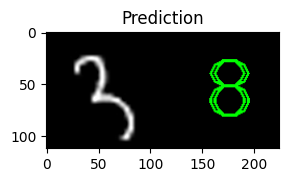

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


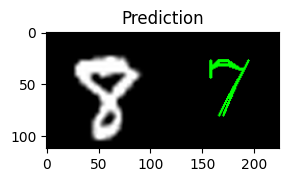

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


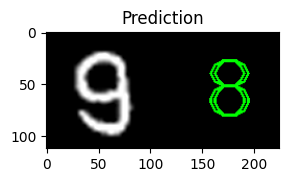

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


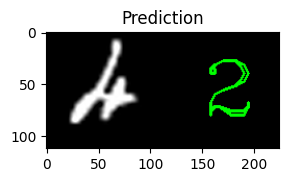

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


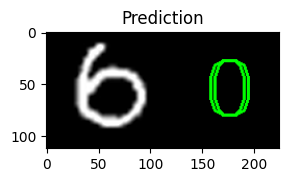

In [24]:
import cv2
import numpy as np

# Reload our data since we rescaled it
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.mnist.load_data()

def draw_test(name, pred, input_im):
    '''Function that places the predicted class next to the original image'''
    # Create our black background
    BLACK = [0,0,0]
    # Expanded our original image to the right to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    # Get a random data image from our test dataset
    # rand = np.random.randint(0,len(x_test))
    # input_im = x_test[rand]
    input_im=x_test[misclassified_index[0][i]]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1)

    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL))

**A more elegant way to plot this**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


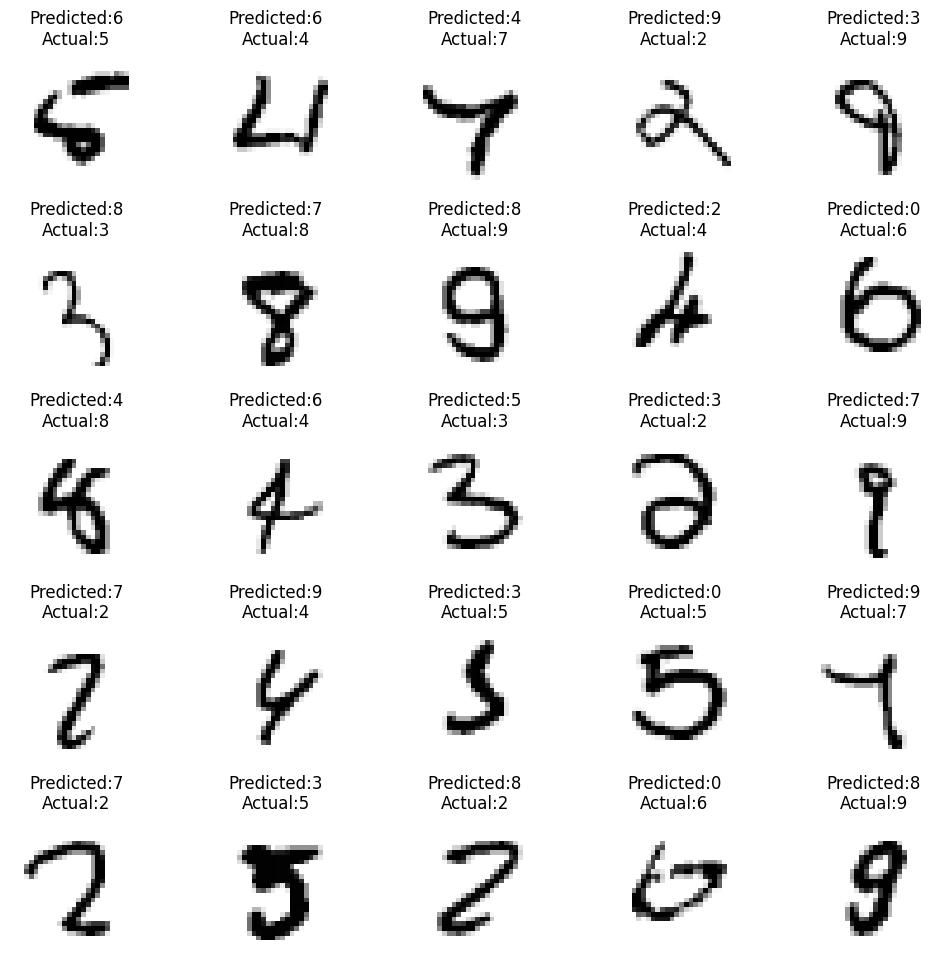

In [25]:
L=5
W=5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes=axes.ravel() #
for i in np.arange(0, L * W):
    input_im = x_test[misclassified_index[0][i]]
    ind=misclassified_index[0][i]
    predicted_class=str(np.argmax(model.predict(input_im.reshape(1,28,28,1)), axis=-1)[0])
    axes[i].imshow(input_im.reshape(28,28),cmap='gray_r')
    axes[i].set_title("Predicted:"+predicted_class+"\n"+"Actual:"+str(y_test[ind]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)


**Creating our Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Predict the values from the validation dataset
x_test=x_test.reshape(10000,28,28,1)
y_pred = np.argmax(model.predict(x_test),axis=-1)
print(confusion_matrix(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 964    0    1    2    0    3    6    1    3    0]
 [   0 1116    3    3    0    1    3    1    7    1]
 [   9    1  965   20    7    0    5    7   15    3]
 [   1    1    9  963    0    8    1    8   10    9]
 [   1    0    7    0  924    0    7    3    5   35]
 [   9    3    0   35    4  805   14    4   10    8]
 [   9    2    4    3    5   10  922    1    2    0]
 [   2    7   20    9    4    0    0  953    4   29]
 [   6    4    3   20    6   10    8    8  900    9]
 [   9    6    2   15   13    2    0    6    5  951]]


In [30]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

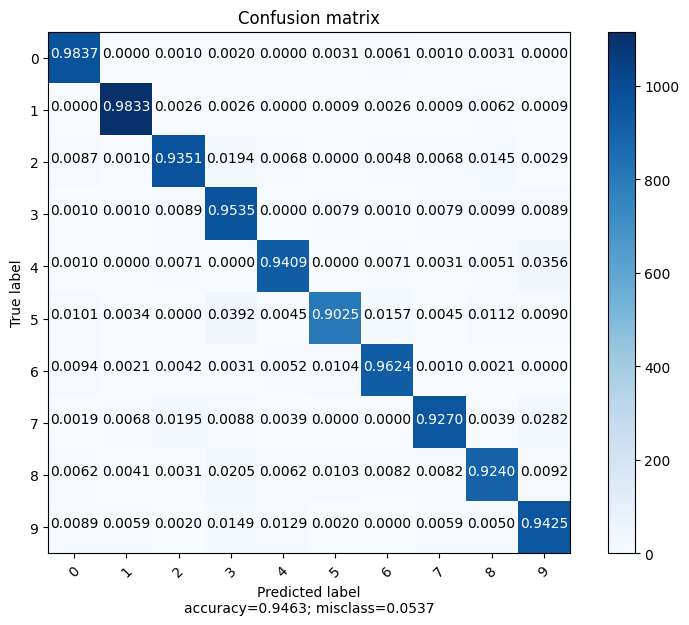

In [31]:
target_names=list(range(0,10))
conf_mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat,target_names)

**Let's look at out per-class accuracy**

In [32]:
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
for(i,ca)in enumerate(class_accuracy):
  print("Class {}: {:.1f}%".format(i,ca))

Class 0: 98.4%
Class 1: 98.3%
Class 2: 93.5%
Class 3: 95.3%
Class 4: 94.1%
Class 5: 90.2%
Class 6: 96.2%
Class 7: 92.7%
Class 8: 92.4%
Class 9: 94.3%


**Now let's look at the Classification Report**

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.90      0.95      0.93      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.90      0.93       892
           6       0.95      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.94      0.92      0.93       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

